In [1]:
import numpy as np
import pickle
import os

from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import warnings


os.chdir("groupshift-model")
from groupshift_model import *

# Run single simulations

In [ ]:
# Model parameters
num_nodes = 1000
num_groups = 2
timesteps = 10000
dims = 1                # Opinion dimensions (may not work)
lowvalence = 0          # Low end of opinion values
highvalence = 100       # High end of opinion values
temp = 100              # Num active nodes per timestep
init_method = "initgauss"
ingroup_sample_size=50
outgroup_sample_size=50
# Function used for sampling method
SCOPE = AsymmetricSample(ingroup_sample_size, outgroup_sample_size, "extremity")
# Function used for Attraction effect
GLEAN = Attract(aWidth = 4.0, aAmp = 0.2)
# Function used for Repulsion effect
SHIFT = Repulse(rWidth = 4.0, rAmp = 1.0)

# Dummy values for parameters otherwise used in paralellization
simnum = 1 # This is just for filename purposes
offset_simnum= np.random.randint(10000) # This is used as the seed
foldername = "//"
G = np.array([])
N = np.array([])
N_adj = np.array([])
C = np.array([])

simulation = GroupshiftSim(G,
                           N,
                           N_adj,
                           C,
                           num_nodes,
                           dims,
                           num_groups,
                           timesteps,
                           (lowvalence, highvalence),
                           offset_simnum,
                           temp,
                           init_method,
                           SCOPE,
                           GLEAN,
                           SHIFT,
                           folder = foldername,
                           filename = f'simulation{simnum}')

In [3]:
simulation.initializeSim()
simulation.run_simulation()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [05:24<00:00, 30.80it/s]


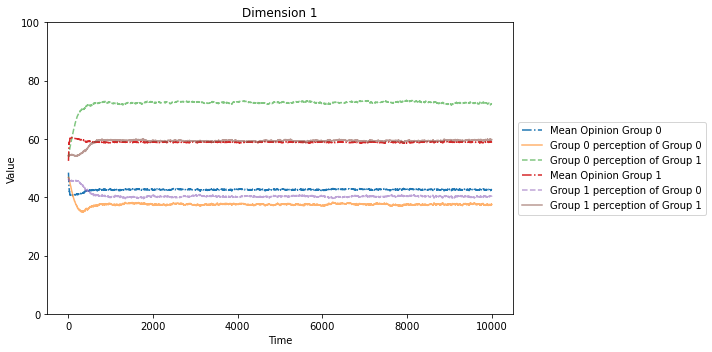

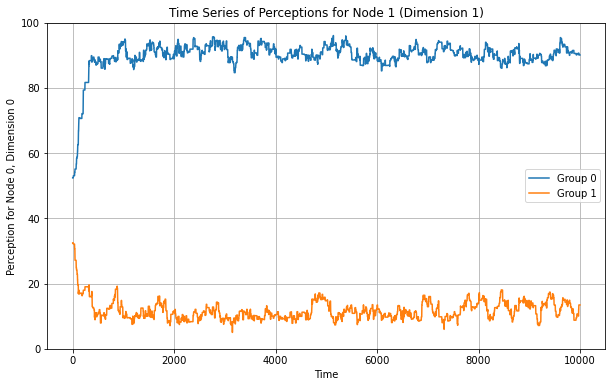

In [4]:
simulation.plot_group_values()
simulation.plot_indiv_values(0)